# Project: Writing a Data Scientist Blog Post

## Introduction and Question

- Ford GoBike System Data: This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

- The data including information of 183.412 ford gobike trips in San Francisco area with 16 variables (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude ,end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip). But some data have wrong so it needs to be clean them.

- Question: How location distribution, user type, user age and also gender afftect to the trip?

## Data Cleaning and Accessing

### Data Cleaning

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.simplefilter("ignore")

In [5]:
ford_df = pd.read_csv("201902-fordgobike-tripdata.csv")
ford_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
ford_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
ford_df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

#### Some columns have wrong datatype. So I need to convert them.

1. start_time and end_time shoud be datetime instend object

2. bike_share_for_all_trip should be converted to boolean instead

In [6]:
ford_df['start_time'] = ford_df['start_time'].astype('datetime64[ns]')
ford_df['end_time'] = ford_df['end_time'].astype('datetime64[ns]')

In [7]:
ford_df.bike_share_for_all_trip = ford_df.bike_share_for_all_trip.replace({"Yes": True, "No":False}).astype(bool)

In [8]:
ford_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

### Data Accessing

#### What are percentage of User Type and Member Gender?

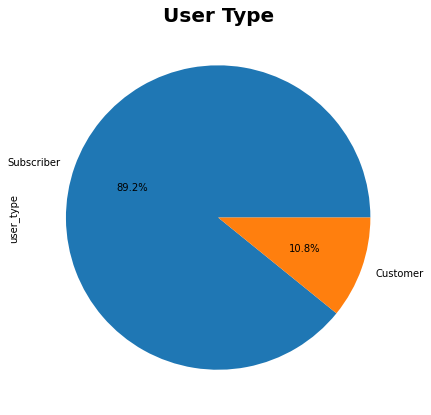

In [9]:
user_type = ford_df['user_type'].value_counts()
ax = user_type.plot(kind='pie', autopct= '%1.1f%%',figsize=(7, 7));
# set the title
ax.set_title("User Type" , fontsize=20, fontweight='bold');

There's huge number of people that have subscribed.

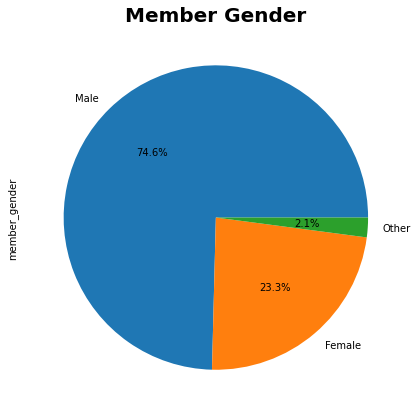

In [10]:
member_gender = ford_df['member_gender'].value_counts()
ax = member_gender.plot(kind='pie', autopct= '%1.1f%%',figsize=(7, 7));
# set the title
ax.set_title("Member Gender" , fontsize=20, fontweight='bold');

Member gender male is more than female. Female is more than Other

#### Is there any relationship between duration second and user type?

In [29]:
def barplot(col, title, xlabel, ylabel, rotation):
    """
        This function provide the counts for the each series in the column and plot it in bar plot.
        Input: column, title, xlabel, ylabel, rotation of xticks.
        
        Output: plt bar plot of value counts
    """
    fig, ax = plt.subplots(figsize = (6,6), dpi = 120);
    col.value_counts().plot(kind='bar');
    plt.title(title, fontweight='bold');
    plt.ylabel(xlabel);
    plt.xlabel(ylabel);
    plt.xticks(rotation=rotation);

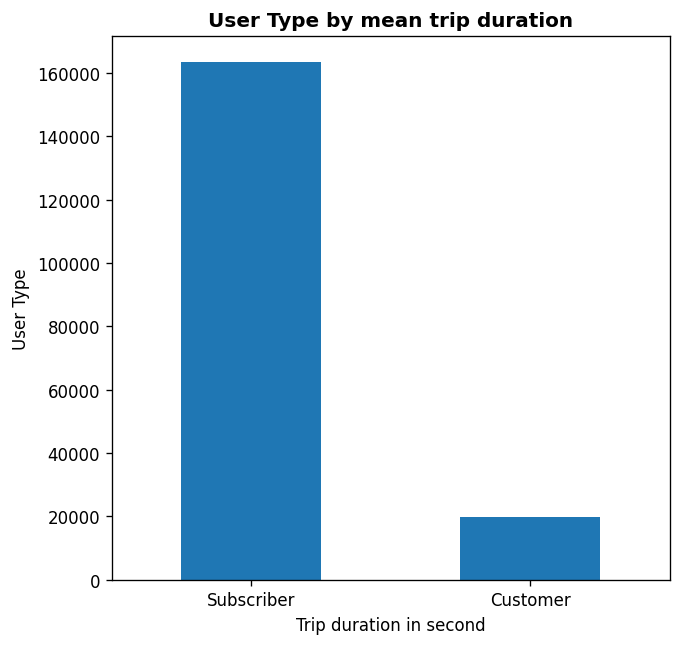

In [30]:
barplot(ford_df['user_type'], "User Type by mean trip duration", "User Type", "Trip duration in second", 0)

Although the number of Subscriber user is more than number of Customer, Customer trip duration is more than Subscriber

#### Is there any relationship between duration second, week day and user type?

In [13]:
x = ford_df['start_time'].dt.day_name()
y = 'duration_sec'
orders = ["Monday", "Tuesday","Wednesday", "Thursday", "Friday","Saturday","Sunday"]

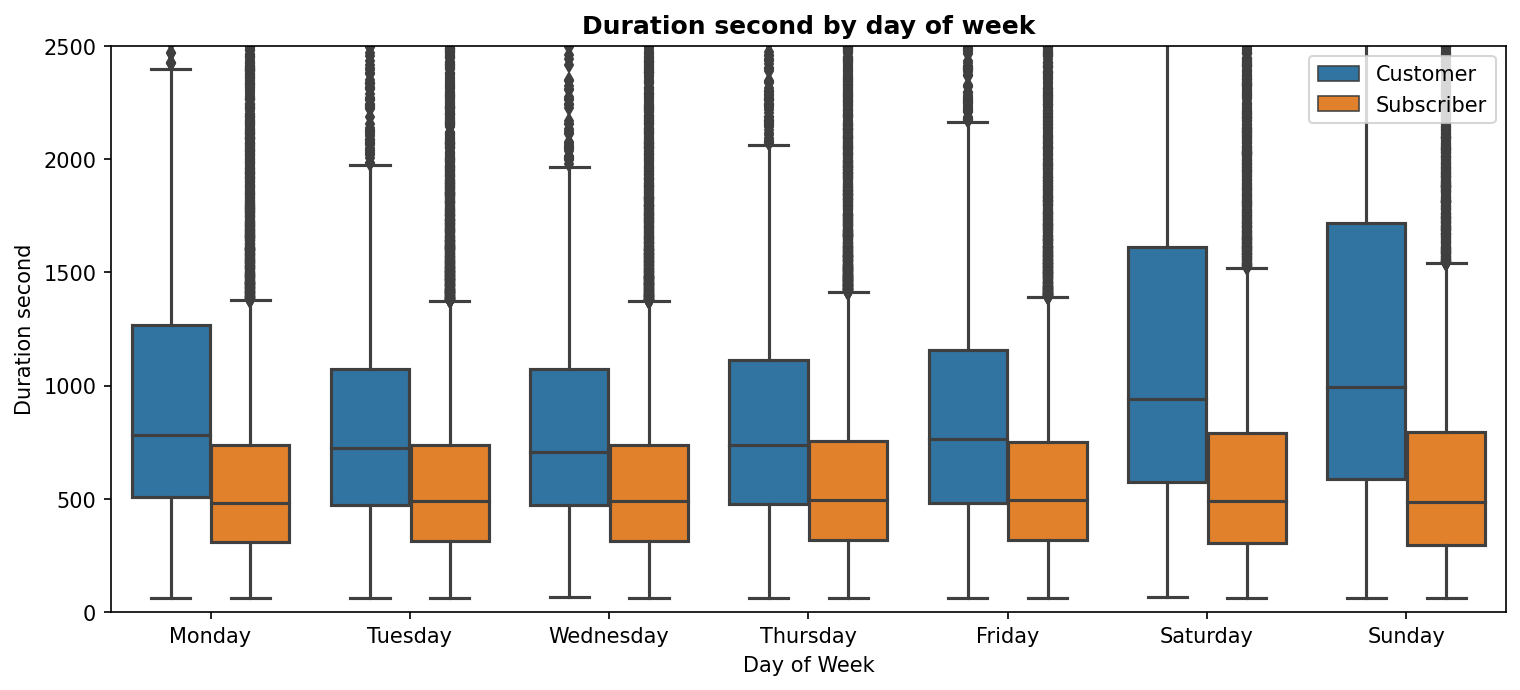

In [14]:
fig, ax = plt.subplots(figsize = (12,5), dpi = 150);
sns.boxplot(data=ford_df, x=x, y=y, order=orders,hue='user_type');
plt.ylim([0,2500]);
plt.title("Duration second by day of week", fontweight='bold');
plt.xlabel("Day of Week");
plt.ylabel("Duration second");
plt.legend(loc=1);

It seems that more trip in weekend than day week for Customer and for Subscriber it the same for all week.

#### What is top 10 Start and End Station have most rider?

In [15]:
average_line = ford_df['bike_id'].count() / ford_df.groupby(['start_station_name'])['start_station_name'].count()
average_line = average_line.nunique()

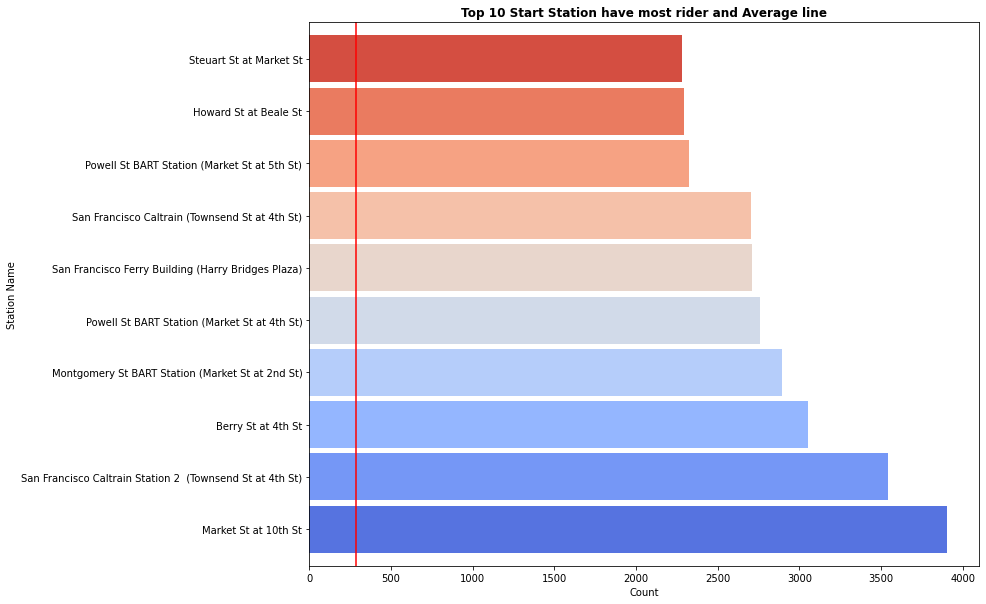

In [16]:
# Separate the genre based on the pipe (|).
ford_df['start_station_name'] = ford_df['start_station_name'].astype(str)
stationList = ford_df['start_station_name'].str.split('|')

# Create list of station
station = []
for i in stationList:
    station.extend(i)
    
# Plot based on the value counts
plt.subplots(figsize=(12,10));
pd.Series(station).value_counts()[:10].sort_values(ascending=False).plot.barh(width=0.9,color=sns.color_palette('coolwarm',10));
plt.title('Top 10 Start Station have most rider and Average line', fontweight='bold');
plt.xlabel('Count');
plt.ylabel('Station Name');
plt.vlines(x=average_line, ymin=-2, ymax=20, color='r');
plt.show();

Based on the chart above, it demonstrates that Market St at 10th St has most rider when they start riding

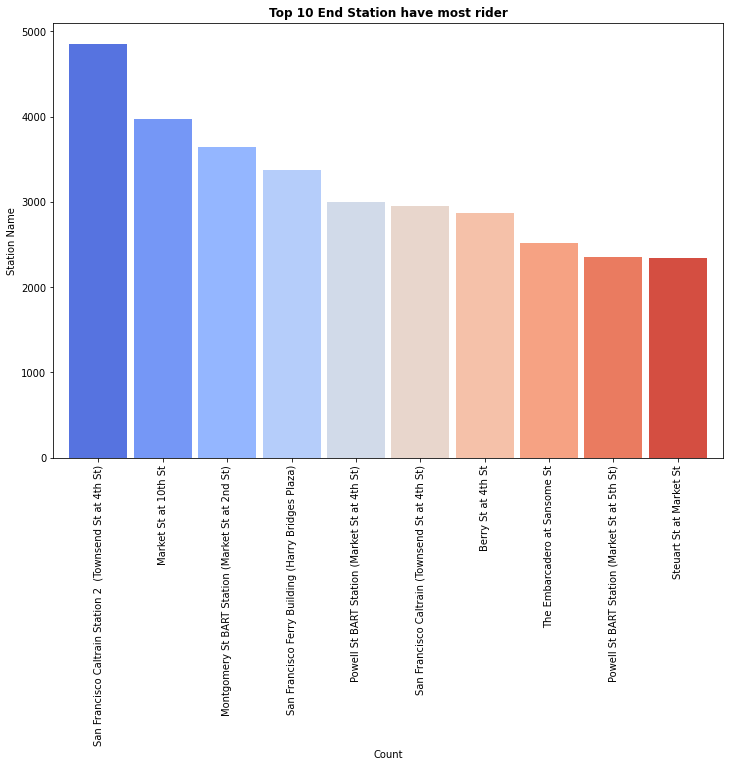

In [18]:
# Separate the genre based on the pipe (|).
ford_df['end_station_name'] = ford_df['end_station_name'].astype(str)
stationList = ford_df['end_station_name'].str.split('|')

# Create list of station
station = []
for i in stationList:
    station.extend(i)
    
# Plot based on the value counts
plt.subplots(figsize=(12,8));
pd.Series(station).value_counts()[:10].sort_values(ascending=False).plot.bar(width=0.9,color=sns.color_palette('coolwarm',10));
plt.title('Top 10 End Station have most rider', fontweight='bold');
plt.xlabel('Count');
plt.ylabel('Station Name');
plt.show();

Based on the chart above, it demonstrates that Market St at 10th St has most rider when they start riding. But the end station is not this one. It's a San Francisco Caltrain Staion 2 because maybe around this station have a lot the beautiful place or famous restaurant,...

## Conclusions

In conclusion, Subcribers have a huge ratio, but customers spend more time on riding than another. As a result, we need to have a strategy to convert them to our customers. Besides, Almost riders usually ride bicycle at weekend. That is great if we orginize some gameshow, marketing programs at that time to attract more customers.